**Importing Necessary Packages**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 📖 Mathematical Recall: Linear Regression & Regularization (OLS, Ridge, Lasso)

### 🔹 What is Linear Regression?
**Linear Regression** is a method to model the relationship between a dependent variable (**target**) and one or more independent variables (**features**).  
The model assumes a linear relationship:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$$

where:
- $\beta_0$ is the **intercept** (the value of $y$ when all $x_i = 0$),
- $\beta_1, ..., \beta_n$ are the **regression coefficients** (weights),
- $\epsilon$ is the **error term** (unexplained variance).

---

### 🔹 How to Estimate the Coefficients? (OLS Method)
The most common method to estimate $\beta$ coefficients is **Ordinary Least Squares (OLS)**.  
This method minimizes the **sum of squared residuals (errors)**:

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where:
- $y_i$ is the actual observed value,
- $\hat{y}_i$ is the predicted value,
- The goal is to minimize **RSS (Residual Sum of Squares)**.

---

### 🔹 OLS Solution Using Matrix Form
We can represent the linear regression system in matrix form as:

$$
Y = X \beta + \epsilon
$$

where:
- **$Y$** is the vector of target values $(n \times 1)$,
- **$X$** is the matrix of feature values $(n \times p)$,
- **$\beta$** is the vector of coefficients $(p \times 1)$,
- **$\epsilon$** is the error vector.

Using **OLS**, the optimal coefficients $\beta$ can be found using the **normal equation**:

$$
\beta = (X^T X)^{-1} X^T Y
$$

This equation provides the **closed-form solution** for linear regression.

---

### 🔹 Assumptions of OLS Regression
For OLS to provide **best linear unbiased estimates (BLUE)**, we assume:
1. **Linearity**: The relationship between $X$ and $y$ is linear.
2. **No Multicollinearity**: The features $X$ are not highly correlated.
3. **Homoscedasticity**: Constant variance of residuals.
4. **Normality of Errors**: Residuals are normally distributed.
5. **No Autocorrelation**: Residuals are not correlated with each other.

---

### 🔹 Limitations of OLS
- **Sensitive to outliers**: Large deviations can significantly impact $\beta$ estimates.
- **Multicollinearity issues**: If features are highly correlated, $(X^T X)^{-1}$ becomes unstable.
- **Computational cost**: Inverting $(X^T X)$ is expensive for large datasets.

To address these, **regularized regression** techniques like **Ridge Regression (L2 penalty)** and **Lasso Regression (L1 penalty)** can be used.

---

## 📖 Regularized Regression: Ridge and Lasso

### 🔹 Ridge Regression (L2 Regularization)
Ridge Regression **modifies the OLS loss function** by adding an L2 penalty:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

- The **L2 penalty** **shrinks coefficients** but does **not set them to zero**.
- Useful when **multicollinearity** is present (highly correlated features).
- Reduces overfitting without eliminating features completely.

The Ridge solution modifies the normal equation:

$$
\beta = (X^T X + \lambda I)^{-1} X^T Y
$$

where **$\lambda$** is a hyperparameter controlling regularization strength.

---

### 🔹 Lasso Regression (L1 Regularization)
Lasso Regression **adds an L1 penalty** to the OLS loss function:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

- The **L1 penalty** forces some coefficients to **exactly zero**.
- Helps in **feature selection** by removing less important features.
- Used when we suspect that **only a few features are important**.

Unlike Ridge, **Lasso does not have a closed-form solution** and requires **iterative optimization methods** (like coordinate descent).

---

### 🔹 Comparing OLS, Ridge, and Lasso
| Method | Regularization | Effect on Coefficients | Feature Selection? | Best Used When... |
|--------|--------------|----------------------|-----------------|------------------|
| **OLS** | None | Can be large, sensitive to multicollinearity | ❌ No | Features are independent, dataset is small |
| **Ridge** | L2 | Shrinks but does not eliminate coefficients | ❌ No | Features are highly correlated, overfitting occurs |
| **Lasso** | L1 | Shrinks and **eliminates** some coefficients | ✅ Yes | You want **automatic feature selection** |

---

### 🔹 Alternative: Gradient Descent Optimization
Instead of solving the normal equation, we can optimize $\beta$ using **Gradient Descent**:

$$
\beta_j := \beta_j - \alpha \frac{\partial J}{\partial \beta_j}
$$

where:
- $\alpha$ is the **learning rate**,
- $\frac{\partial J}{\partial \beta_j}$ is the **gradient of the loss function**.

Gradient Descent is useful when:
- The dataset is **large** (computing $(X^T X)^{-1}$ is too slow).
- The matrix $(X^T X)$ is **not invertible**.
- Ridge and Lasso can also be solved using **gradient-based methods**.

---

## ✅ Summary
- **OLS** is the standard method for estimating coefficients in Linear Regression.
- **Ridge Regression (L2 penalty)** reduces overfitting but **keeps all features**.
- **Lasso Regression (L1 penalty)** performs **feature selection** by setting some coefficients to **zero**.
- The choice between Ridge and Lasso depends on whether you want to **keep all features** or **select the most important ones**.

🚀 **Next Steps**  
Want to implement **Ridge and Lasso in Python**? Let's do it!



## 📂 Loading the Dataset

For our regression model, we need a dataset. Here, we use **California Housing** from `sklearn.datasets`.

This dataset contains information about **California housing prices** with the following features:
- 🏠 `MedInc` - Median income in the area
- 📍 `HouseAge` - Median house age
- 👨‍👩‍👧 `AveRooms` - Average number of rooms per household
- 🏡 `AveBedrms` - Average number of bedrooms per household
- 👨‍👩‍👦 `Population` - Total population in the area
- 📏 `AveOccup` - Average household size
- 🌍 `Latitude` - Geographical latitude
- 📍 `Longitude` - Geographical longitude

The **target variable** represents the **median house value** in units of **100,000 dollars**.

---


In [57]:
# Importing dataset
from sklearn.datasets import fetch_california_housing

# Loading the data
data = fetch_california_housing()

# Creating a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Adding the target variable (house prices)
df["Target"] = data.target

# Displaying the first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
# Display basic statistics of the dataset
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


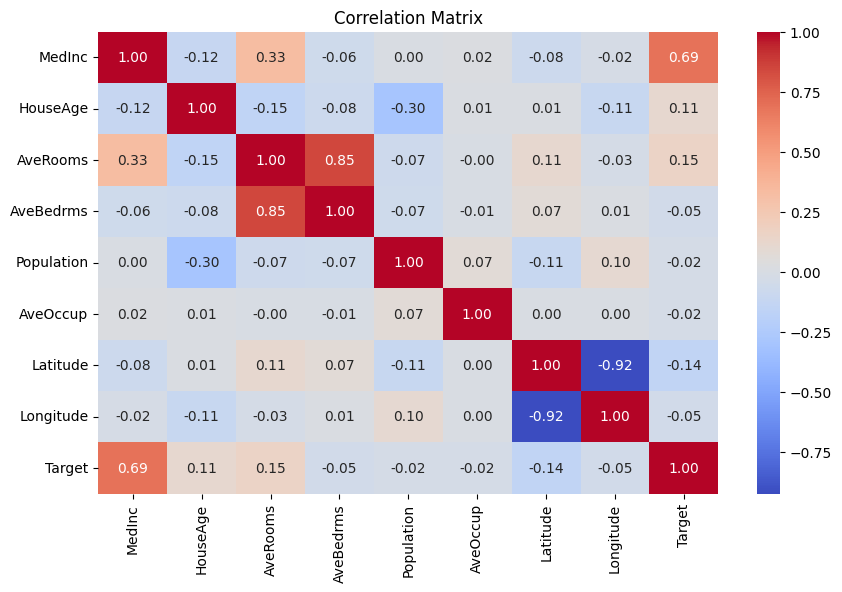

In [81]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 📂 Data Preprocessing: Handling Missing Values & Outliers

Before training our model, we need to clean and preprocess the data.

### 🔹 Steps:
1️⃣ **Check for missing values** and handle them (replace with median/mean).  
2️⃣ **Detect and remove outliers** using the **Z-score** method.  
3️⃣ **Feature scaling (normalization)** to standardize values.  
4️⃣ **Split dataset into training & testing sets** for model training.

---

In [60]:
# 1️⃣ Checking for missing values
print("🔍 Missing values per column:\n", df.isnull().sum())

# Replace NaN values with the median (alternative: df.mean())
df.fillna(df.median(), inplace=True)

# 2️⃣ Detecting and removing outliers using the Z-score method
z_scores = np.abs(stats.zscore(df))
df_cleaned = df[(z_scores < 3).all(axis=1)]  # Keep values where Z-score < 3

print(f"📉 Dataset size before and after outlier removal: {df.shape} → {df_cleaned.shape}")

# 3️⃣ Separating features and target after cleaning
X = df_cleaned.drop(columns=["Target"])
y = df_cleaned["Target"]

# 4️⃣ Normalization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


🔍 Missing values per column:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64
📉 Dataset size before and after outlier removal: (20640, 9) → (19794, 9)
Train size: (15835, 8), Test size: (3959, 8)


## 🤖 Model Training: Linear Regression

Now that we have preprocessed our dataset, we can train a **Linear Regression model**.

### 🔹 Steps:
1️⃣ **Initialize** the model.  
2️⃣ **Train** it using the training dataset.  
3️⃣ **Extract and analyze the learned coefficients** to understand feature importance.

---

In [109]:
# 1️⃣ Initialize models
model_ols = LinearRegression()
model_ridge = Ridge(alpha=1.0)  # Adjust alpha for more/less regularization
model_lasso = Lasso(alpha=0.01)  # Adjust alpha for stronger feature selection

# 2️⃣ Train models
model_ols.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

## 📊 Model Evaluation: Performance Metrics

Once the model is trained, we need to evaluate how well it performs on unseen data.

### 🔹 Metrics Used:
1️⃣ **R² (Coefficient of Determination)**: Measures how well the model explains variance in the target variable.
   $$
   R^2 = 1 - \frac{\sum (y_{\text{true}} - y_{\text{pred}})^2}{\sum (y_{\text{true}} - \bar{y})^2}
   $$
   - **Closer to 1 → Better fit**
   - **Closer to 0 → Poor fit**

2️⃣ **MSE (Mean Squared Error)**: Measures the average squared difference between actual and predicted values.
   $$
   MSE = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2
   $$

3️⃣ **RMSE (Root Mean Squared Error)**: The square root of MSE, giving errors in the same unit as the target variable.
   $$
   RMSE = \sqrt{MSE}
   $$

4️⃣ **MAE (Mean Absolute Error)**: Measures the average absolute difference between actual and predicted values.
   $$
   MAE = \frac{1}{n} \sum |y_{\text{true}} - y_{\text{pred}}|
   $$

---

In [110]:
# 1️⃣ Make predictions for each model
y_pred_ols = model_ols.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

# 2️⃣ Define a function to calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"📊 Performance of {model_name}:")
    print(f"R² (Coefficient of Determination): {r2:.4f}")
    print(f"MSE (Mean Squared Error): {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print("-" * 50)

# 3️⃣ Evaluate each model
evaluate_model(y_test, y_pred_ols, "OLS Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")




📊 Performance of OLS Regression:
R² (Coefficient of Determination): 0.6175
MSE (Mean Squared Error): 0.4713
RMSE (Root Mean Squared Error): 0.6865
MAE (Mean Absolute Error): 0.4964
--------------------------------------------------
📊 Performance of Ridge Regression:
R² (Coefficient of Determination): 0.6175
MSE (Mean Squared Error): 0.4713
RMSE (Root Mean Squared Error): 0.6865
MAE (Mean Absolute Error): 0.4964
--------------------------------------------------
📊 Performance of Lasso Regression:
R² (Coefficient of Determination): 0.6169
MSE (Mean Squared Error): 0.4721
RMSE (Root Mean Squared Error): 0.6871
MAE (Mean Absolute Error): 0.4964
--------------------------------------------------


## 📈 Predictions vs. Actual Values: Scatter Plot

To assess how well our model is performing, we can visualize **predicted values vs. actual values**.

### 🔹 How to Interpret the Plot?
- **The red dashed line** represents a **perfect prediction** where $y_{\text{true}} = y_{\text{pred}}$.
- **If predictions are close to this line**, the model performs well.
- **Points deviating significantly** from this line indicate errors in prediction.

---

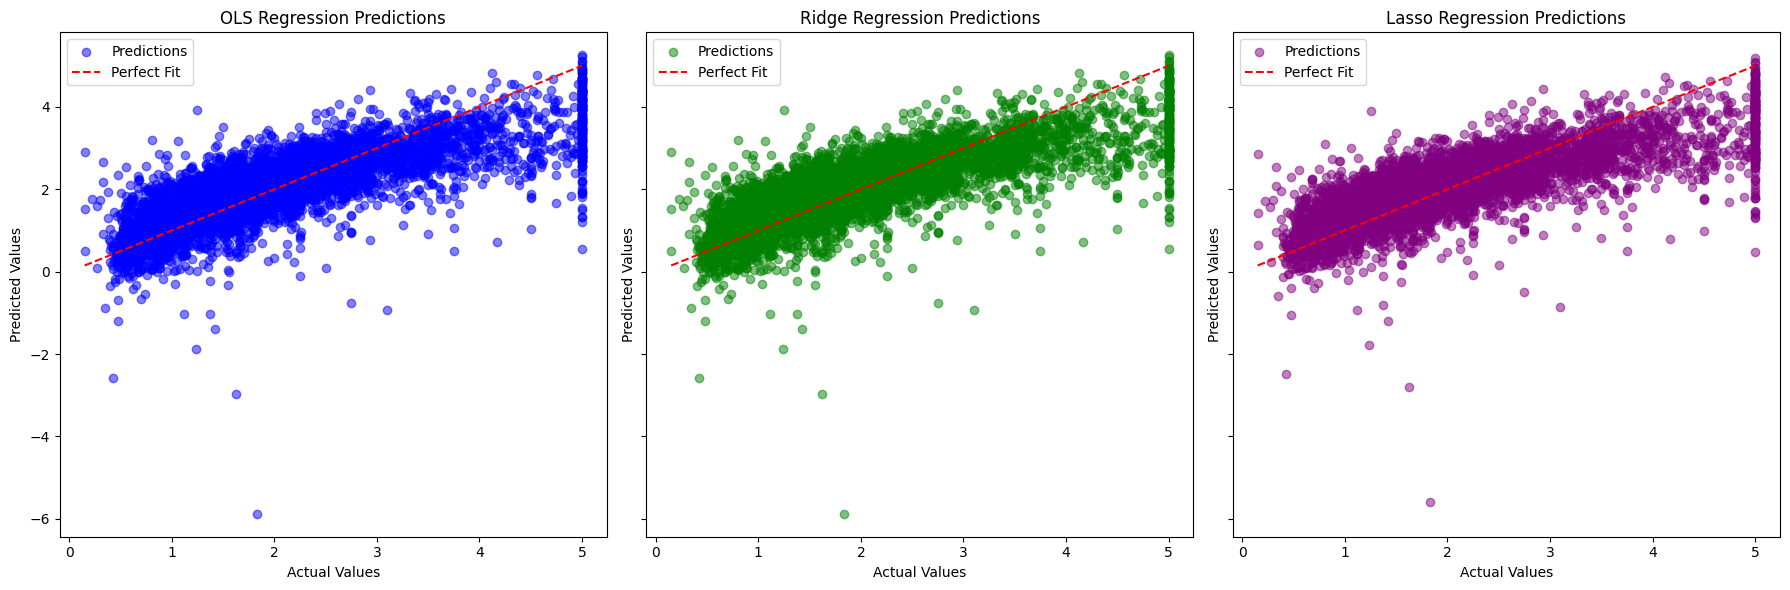

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Titles for the models
titles = ["OLS Regression Predictions", "Ridge Regression Predictions", "Lasso Regression Predictions"]
predictions = [y_pred_ols, y_pred_ridge, y_pred_lasso]
colors = ["blue", "green", "purple"]

# Loop through subplots to create scatter plots
for i, ax in enumerate(axes):
    ax.scatter(y_test, predictions[i], alpha=0.5, label="Predictions", color=colors[i])
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red", label="Perfect Fit")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



## 🔍 Interpreting Feature Importance: Coefficients

Linear regression assigns **coefficients** to each feature, which indicate their influence on the target variable.

### 🔹 How to Interpret the Coefficients?
- **Positive coefficient (+)** → The feature **increases** the target value.
- **Negative coefficient (-)** → The feature **decreases** the target value.
- **Zero or near-zero coefficient** → The feature has little or no impact.

---

In [66]:
coef_df = pd.DataFrame({
    "Feature": data.feature_names,
    "OLS Coeff": model_ols.coef_,
    "Ridge Coeff": model_ridge.coef_,
    "Lasso Coeff": model_lasso.coef_
})

# Sort features by absolute OLS coefficients for better readability
coef_df = coef_df.set_index("Feature").sort_values(by="OLS Coeff", ascending=False)

# Display the DataFrame
display(coef_df)

,OLS Coeff,Ridge Coeff,Lasso Coeff
Feature,,,
MedInc,0.830709,0.830756,0.633325
AveBedrms,0.192046,0.191994,0.000000
HouseAge,0.152183,0.152250,0.113392
Population,0.027143,0.027166,0.000000
AveOccup,-0.213462,-0.213461,-0.134627
AveRooms,-0.224198,-0.224228,-0.000000
Longitude,-0.792591,-0.791756,-0.000000
Latitude,-0.840904,-0.840061,-0.026599


# 📚 Annex: Mathematical Derivation of Beta (β) in Linear Regression

In this section, we derive the **Ordinary Least Squares (OLS) estimator** **$\beta$**, using:
1. **Derivative method** (Gradient of RSS)
2. **Projection matrix approach** (Geometric interpretation)
3. **Likelihood method** (Maximum Likelihood Estimation)

---

## 📖 1. Derivation of β Using Derivatives
### 🔹 Ordinary Least Squares (OLS) Formulation
We aim to minimize the **Residual Sum of Squares (RSS)**:

$$
J(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2
$$

Or, in matrix form:

$$
J(\beta) = (y - X\beta)^T (y - X\beta)
$$

### 🔹 Compute the Gradient
To minimize **$J(\beta)$**, take the **partial derivative** with respect to **$\beta$**:

1. Expand the function:

$$
J(\beta) = y^T y - 2 y^T X \beta + \beta^T X^T X \beta
$$

2. Take the derivative:

$$
\frac{\partial J(\beta)}{\partial \beta} = -2 X^T y + 2 X^T X \beta
$$

3. Set the derivative to **zero** for minimization:

$$
X^T X \beta = X^T y
$$

4. Solve for **$\beta$**:

$$
\beta = (X^T X)^{-1} X^T y
$$

This is the **Normal Equation**, providing the optimal **least-squares estimate** of $\beta$.

---

## 📖 2. Derivation Using Projection Matrix (Geometric Interpretation)
### 🔹 Understanding the Projection
- The goal of OLS is to find **$\beta$** such that the predicted values **$\hat{y}$** are the closest projection of **$y$** onto the column space of **$X$**.
- This means that **the residuals are orthogonal** to the column space of **$X$**:

$$
y - X\beta \perp X
$$

### 🔹 Orthogonality Condition
Mathematically, this translates to:

$$
X^T (y - X\beta) = 0
$$

Expanding:

$$
X^T y - X^T X \beta = 0
$$

Rearrange:

$$
X^T X \beta = X^T y
$$

Solving for **$\beta$**:

$$
\beta = (X^T X)^{-1} X^T y
$$

### 🔹 Projection Matrix Definition
We define the **hat matrix (projection matrix)**:

$$
H = X (X^T X)^{-1} X^T
$$

which projects **$y$** onto the column space of **$X$**:

$$
\hat{y} = Hy
$$

where **$H$** satisfies:

$$
H^2 = H
$$

This shows that **$\hat{y}$** is the best linear approximation of **$y$** in the column space of **$X$**.

---

## 📖 3. Maximum Likelihood Estimation (MLE) of β
### 🔹 Likelihood Function for Linear Regression
Assume the response variable **$y$** follows a normal distribution:

$$
y \sim \mathcal{N}(X\beta, \sigma^2 I)
$$

The probability density function (PDF) is:

$$
p(y | X, \beta, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{n/2}} \exp \left( -\frac{1}{2\sigma^2} || y - X\beta ||^2 \right)
$$

### 🔹 Log-Likelihood Function
Taking the **logarithm**:

$$
\log L(\beta, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta)
$$

### 🔹 Maximizing the Log-Likelihood
To find **$\beta$**, take the **derivative** with respect to **$\beta$** and set it to **zero**:

$$
\frac{\partial}{\partial \beta} \left( -\frac{1}{2\sigma^2} (y - X\beta)^T (y - X\beta) \right) = 0
$$

Expanding:

$$
- \frac{1}{\sigma^2} X^T (y - X\beta) = 0
$$

Rearrange:

$$
X^T X \beta = X^T y
$$

Solving for **$\beta$**:

$$
\beta = (X^T X)^{-1} X^T y
$$

Thus, **MLE estimation of $\beta$ coincides with the OLS estimator.**

---

## ✅ Summary
✔ **Derivative Method** → Minimizing RSS gives **Normal Equation**.  
✔ **Projection Method** → Shows that **OLS is the best linear approximation** of $y$.  
✔ **Likelihood Method** → Derives **OLS estimator as the MLE solution** under normality assumption.  

🚀 **This mathematical foundation is essential for interviews and deep understanding of regression.**


# 📚 Annex: Common Interview Questions for Linear Regression

This section includes **frequently asked interview questions** for **Linear Regression**, covering:
- **Theoretical Concepts**
- **Mathematical Derivations**
- **Practical Implementation**
- **Advanced Topics**

---

## 📖 1. Theoretical Questions
### 🔹 General Questions
1. **What is Linear Regression? How does it work?**
2. **What are the assumptions of Ordinary Least Squares (OLS)?**
3. **What is the difference between Simple and Multiple Linear Regression?**
4. **What happens when the assumptions of Linear Regression are violated?**
5. **Why is the OLS estimator unbiased?**
6. **How do you interpret the coefficients in a Linear Regression model?**
7. **What is the role of the intercept ($\beta_0$) in Linear Regression?**
8. **Why do we use Mean Squared Error (MSE) as a loss function in OLS?**
9. **What is the geometric interpretation of Linear Regression?**
10. **Why is Linear Regression considered a parametric model?**

---

## 📖 2. Mathematical Questions
### 🔹 Derivations & Formulas
1. **Derive the Normal Equation for Linear Regression.**
2. **Explain the meaning of the hat matrix ($H = X(X^T X)^{-1}X^T$).**
3. **Show that the residuals are orthogonal to the feature space ($X^T e = 0$).**
4. **Prove that the OLS estimator is the Maximum Likelihood Estimator (MLE) under Gaussian noise.**
5. **What is the variance of the OLS estimator $\beta$?**
6. **Derive the formula for the confidence interval of regression coefficients.**
7. **Explain why OLS minimizes the sum of squared residuals.**
8. **Show that the expectation of the residuals is zero: $E[\epsilon] = 0$.**
9. **How does the variance of the estimated $\beta$ change with more data points?**
10. **Derive the Bias-Variance tradeoff formula in the context of Linear Regression.**

---

## 📖 3. Practical Implementation Questions
### 🔹 Model Evaluation & Implementation
1. **What are different ways to evaluate a Linear Regression model?**
2. **Explain the difference between R², Adjusted R², MSE, RMSE, and MAE.**
3. **How do you handle missing values in a dataset before training a regression model?**
4. **How do you deal with categorical variables in Linear Regression?**
5. **What are some common data transformations used in regression?**
6. **How would you handle multicollinearity in your dataset?**
7. **When should you use Polynomial Regression instead of Linear Regression?**
8. **What is the impact of feature scaling in Linear Regression?**
9. **What is the difference between a high bias model and a high variance model?**
10. **How would you detect and handle outliers in a dataset?**

---

## 📖 4. Advanced Topics
### 🔹 Regularization, Feature Selection & Optimization
1. **What is Ridge Regression, and how does it differ from OLS?**
2. **Explain Lasso Regression and how it performs feature selection.**
3. **How do Ridge and Lasso affect the variance of the model?**
4. **What is Elastic Net Regression, and when would you use it?**
5. **Why does Lasso tend to set some coefficients exactly to zero?**
6. **How do you select the optimal value for $\lambda$ in Ridge/Lasso Regression?**
7. **What is the difference between L1 and L2 regularization in terms of gradient descent?**
8. **What are the limitations of Ridge and Lasso Regression?**
9. **What happens if you apply Ridge Regression to a dataset with highly correlated features?**
10. **How would you implement Gradient Descent for Linear Regression from scratch?**

---

## 📖 5. Common Troubleshooting Questions
### 🔹 Diagnosing Model Issues
1. **How would you detect multicollinearity in a dataset?**
2. **What steps would you take if your model is underfitting?**
3. **What would you do if your model is overfitting?**
4. **How can you improve a Linear Regression model’s performance?**
5. **What are some limitations of Linear Regression?**
6. **What are the main reasons why a Linear Regression model might not perform well?**
7. **How do you check if your residuals are normally distributed?**
8. **What does it mean when the R² value is negative?**
9. **Why might a high R² not always indicate a good model?**
10. **How do you handle correlated features when building a Linear Regression model?**

---

# 📚 Annex: Common Interview Questions & Answers for Linear Regression

This section provides **concise answers** to frequently asked **Linear Regression** interview questions, covering:
- **Theoretical Concepts**
- **Mathematical Derivations**
- **Practical Implementation**
- **Advanced Topics**

---

## 📖 1. Theoretical Questions

1️⃣ **What is Linear Regression? How does it work?**  
   - A method to model the relationship between **dependent ($y$) and independent variables ($X$)** using a linear equation:  
     $$ y = X\beta + \epsilon $$  

2️⃣ **What are the assumptions of Ordinary Least Squares (OLS)?**  
   - **Linearity**, **No multicollinearity**, **Homoscedasticity**, **Normality of errors**, **No autocorrelation**.  

3️⃣ **What is the difference between Simple and Multiple Linear Regression?**  
   - **Simple**: 1 feature → 1 output.  
   - **Multiple**: Multiple features → 1 output.  

4️⃣ **What happens when OLS assumptions are violated?**  
   - **Bias, high variance, misleading coefficients**, incorrect confidence intervals.  

5️⃣ **Why is the OLS estimator unbiased?**  
   - Because **$E[\beta] = \beta_{\text{true}}$** under **$E[\epsilon] = 0$** assumption.  

6️⃣ **How do you interpret the coefficients in Linear Regression?**  
   - $\beta_i$ means that **a 1-unit change in $x_i$** results in a **$\beta_i$ change in $y$**, keeping others constant.  

7️⃣ **Why do we use Mean Squared Error (MSE) as a loss function?**  
   - **Easier to differentiate** and **penalizes larger errors**.  

8️⃣ **What is the geometric interpretation of Linear Regression?**  
   - It finds **$\beta$** such that **$X\beta$** is the best projection of **$y$** onto the column space of **$X$**.  

---

## 📖 2. Mathematical Questions

1️⃣ **Derive the Normal Equation for Linear Regression.**  
   - **Minimize RSS**:  
     $$ J(\beta) = || y - X\beta ||^2 $$
   - **Differentiate and solve**:  
     $$ \beta = (X^T X)^{-1} X^T y $$  

2️⃣ **Explain the meaning of the hat matrix ($H = X(X^T X)^{-1}X^T$).**  
   - **Projection matrix** that transforms $y$ into **$\hat{y}$**, the closest fit in the feature space.  

3️⃣ **Show that residuals are orthogonal to the feature space ($X^T e = 0$).**  
   - Residuals: $e = y - X\beta$  
   - Since $X\beta$ is the projection,  
     $$ X^T e = 0 $$  

4️⃣ **Show that the OLS estimator is the Maximum Likelihood Estimator (MLE) under Gaussian noise.**  
   - **Assume** $y \sim \mathcal{N}(X\beta, \sigma^2 I)$.  
   - **Maximize log-likelihood**, and **MLE solution matches OLS**.  

5️⃣ **What is the variance of the estimated $\beta$ coefficients?**  
   - $$ \text{Var}(\beta) = \sigma^2 (X^T X)^{-1} $$  

---

## 📖 3. Practical Implementation Questions

1️⃣ **How do you handle missing values before training a regression model?**  
   - **Drop rows**, **fill with mean/median**, or **use imputation methods**.  

2️⃣ **How do you detect and handle outliers in a dataset?**  
   - **Z-score method ($|Z| > 3$), IQR method, or robust regression**.  

3️⃣ **What is the difference between Ridge and Lasso Regression?**  
   - **Ridge (L2)**: Shrinks coefficients but **keeps all features**.  
   - **Lasso (L1)**: Shrinks and **eliminates some features**.  

4️⃣ **How do you choose the regularization parameter ($\lambda$) in Ridge/Lasso Regression?**  
   - **Cross-Validation (CV)** or **Grid Search**.  

5️⃣ **How do you evaluate a Linear Regression model beyond R²?**  
   - **MSE, RMSE, MAE, and residual plots**.  

---

## 📖 4. Advanced Topics

1️⃣ **What happens if your model is underfitting?**  
   - Add **more features**, use **polynomial regression**, reduce **regularization**.  

2️⃣ **What would you do if your model is overfitting?**  
   - **Use Ridge/Lasso**, collect **more data**, **reduce model complexity**.  

3️⃣ **How do you handle multicollinearity?**  
   - **Remove correlated features**, **use PCA**, or **apply Ridge Regression**.  

4️⃣ **When should you use Gradient Descent instead of the Normal Equation?**  
   - **For large datasets**, where computing **$(X^T X)^{-1}$ is expensive**.  

5️⃣ **How do you preprocess categorical variables for Linear Regression?**  
   - **One-Hot Encoding** for non-ordinal, **Label Encoding** for ordinal data.  

---

## 📖 5. Common Troubleshooting Questions

1️⃣ **How would you detect multicollinearity?**  
   - **Check correlation matrix or Variance Inflation Factor (VIF > 5).**  

2️⃣ **What steps would you take if your model is underfitting?**  
   - **Add features, use polynomial terms, decrease regularization.**  

3️⃣ **What would you do if your model is overfitting?**  
   - **Regularization (Ridge/Lasso), more data, feature selection.**  

4️⃣ **What does it mean when the R² value is negative?**  
   - The model **performs worse than just predicting the mean** of $y$.  

5️⃣ **Why might a high R² not always indicate a good model?**  
   - It does not account for **overfitting** or whether relationships are **causal**.  

---